# Business Understanding

Het bedrijf PerkinElmer verzameld samples van koeien om daar uit op te maken welke hoeveelheid aan lactose, eiwitten en vetten er in de melk zitten. Op deze manier kunnen ze bepalen hoeveel de boer uitbetaald moet worden gebaseerd op meestal de vetten en/of de eiwitten. 
De officiele methode is duur, kost veel tijd en is alleen specifiek voor dat component dat getest is. Kortom ze zoeken een methode die sneller is, goedkoper en het moet meerdere componenten tegelijk kunnen analyseren.
De alternatieve methode wordt gedaan door een infrarood analysis uit te voeren en zit je dus al te kijken naar het licht spectrum. Verschillende moleculen reageren daar anders op binnen de infrarood range.

### Het infrarood licht

- Near Infrared ~ 700 - 3000nm (0.7 - 3µm)
- Mid Infrared ~ 3000 - 50000nm (3 - 50µm, 3000 - 200cm-1)
- Far Infrared ~ 50000 - 100000nm (50 - 1000µm)

### Meest belangrijke areas:

- Fingerprint (Protein)	        1000 - 1585cm-1 
- C=O (Lactose)			1700 - 1700cm-1
- CH2 (vet)	            2800 - 3000cm-1

Het is aan ons als groep om een model te bedenken die de verhouding tussen vetten, eiwitten en lactose kan bepalen door gebruik te maken van de LASSO techniek.

Het lastige hieraan is dat bijvoorbeeld vet en lactose op dezelfde infrarood frequency kunnen zitten. Daar moet dus onderscheid tussen gemaakt worden. Omdat ze veel op elkaar lijken.

# Data Understanding

Om een model te bedenken hebben wij 48 samples gekregen in .spc file format. Daarin zitten nog per sample 3 replica's. Replica's is een herhaling van hetzelfde sample maar meer om te kijken of deze wel overeen komen en dus vertrouwlijk zijn voor dat sample. 
Daar zouden wij dan een gemiddelde uit kunnen gaan halen???

Daarnaast hebben wij een excel sheet gekregen met daarin de waardes voor vet, eiwitten en lactose voor elke sample. Dit zijn dus onze **Labels**

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Label Data

In [46]:
label_data = pd.read_excel (r'.\Reference values.xlsx')

<AxesSubplot:>

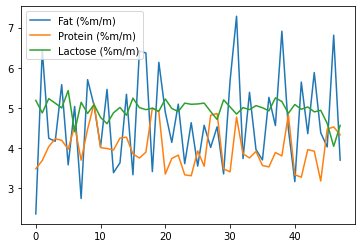

In [47]:
label_data.plot()

In [48]:
print(label_data.shape)
label_data.head()

(48, 4)


,Sample,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,Sample 1.spc,2.362,3.486,5.189
1,Sample 2.spc,6.438,3.692,4.878
2,Sample 3.spc,4.245,4.038,5.233
3,Sample 4.spc,4.171,4.235,5.120
4,Sample 5.spc,5.580,4.195,5.000


Zoals hierboven te zien is laat de label data precies zien welke hoeveelheid van vet, eiwitten en lactose er per sample is gemeten.

## Feature Data

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


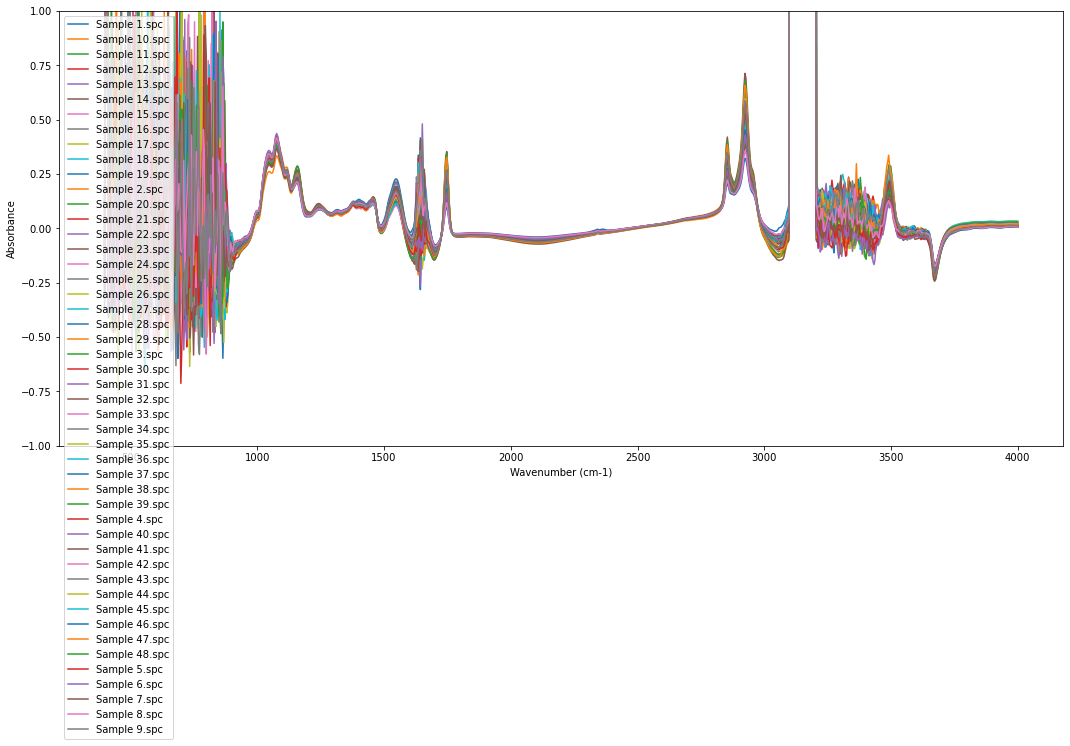

In [49]:
from pyspectra.readers.read_spc import read_spc_dir

df_spc, dict_spc=read_spc_dir('Spectra')

f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Absorbance")
ax.legend(labels= list(df_spc.transpose().columns))
plt.ylim([-1,1])
plt.show()

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


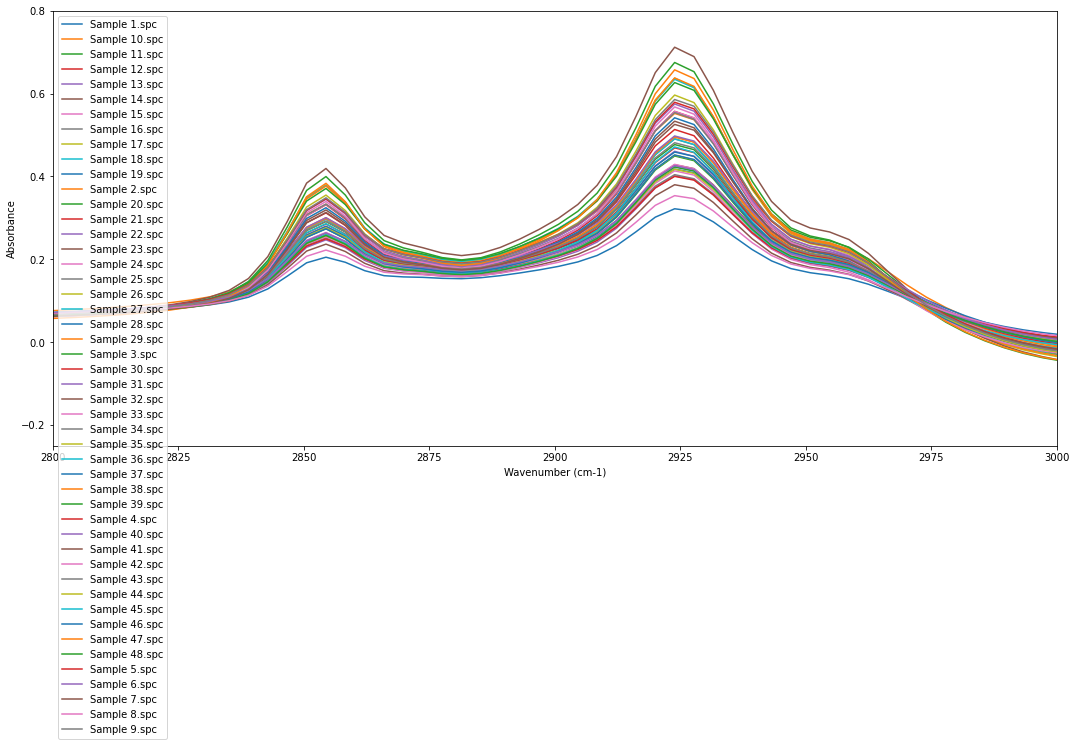

In [89]:
df_spc, dict_spc=read_spc_dir('Spectra')

f, ax =plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Absorbance")
ax.legend(labels= list(df_spc.transpose().columns))
plt.ylim([-0.25,0.80])
plt.xlim([2800,3000])
plt.show()

In de visualisatie is duidelijk te zien dat de meeste samples overeen komen. De belangrijke waardes voor de metingen zitten tussen de 1000 en 3000. Tot 1000 is veel ruis te zien. Dat is meestal water en niet relevant voor ons model. Daarnaast boven de 3000 is een hoge piek te zien. Dit is ook niet relevant voor ons. Wat wel belangrijk is, is dat er net na 1000 aantal steigingen zijn. Na 1500 gebeurt dit weer en net vóór 3000 zijn er ook aantal pieken.

Volgens de presentatie van onze opdrachtgever klopt dit dus ook wat in deze visualisatie te zien is.

Wat hierin wel fout gaat is dat ik alleen de derde subfile te pakken heb. Per sample zijn er 3 replica's gemaakt en wil ik ze ook alle 3 per sample kunnen zien. Daarom zal de pyspectra library niet voldoende zijn voor deze opdracht. Ik kijk nog even verder daar deze data en zal daarna bezig gaan met de subfiles.

In [50]:
print(df_spc.shape)
df_spc.index.name = "samplename"
df_spc.head()

(48, 935)


,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
samplename,,,,,,,,,,,,,,,,,,,,,
Sample 1.spc,0.102523,1.008154,1.008154,1.008154,0.108095,0.386348,0.587932,0.636955,0.505134,0.120575,...,0.008786,0.009086,0.009137,0.008949,0.008572,0.008057,0.007464,0.006890,0.006382,0.005994
Sample 10.spc,-0.079924,1.008154,1.008154,1.008154,0.005067,-0.125471,-0.076960,0.003513,0.189936,0.184983,...,0.016217,0.016301,0.016317,0.016264,0.016161,0.016062,0.015982,0.015956,0.016003,0.016133
Sample 11.spc,-0.323271,1.008154,1.008154,1.008154,-0.067009,0.398773,0.422958,-0.073452,-0.072329,0.295611,...,0.012406,0.012486,0.012379,0.012118,0.011754,0.011350,0.010947,0.010624,0.010413,0.010328
Sample 12.spc,-0.136930,1.008154,1.008154,1.008154,-0.138287,0.183399,0.176318,0.156126,-0.348701,-0.478711,...,0.015737,0.015781,0.015683,0.015497,0.015239,0.014953,0.014692,0.014525,0.014455,0.014493
Sample 13.spc,0.125331,1.008154,1.008154,1.008154,0.475342,0.750735,0.008357,-0.252117,-0.339127,-0.228932,...,0.007578,0.007749,0.007698,0.007442,0.007046,0.006575,0.006088,0.005640,0.005292,0.005095


In de head is te zien dat de metingen beginnen vanaf 397 tot en met 4000.

<AxesSubplot:xlabel='wavenumber', ylabel='absorbance'>

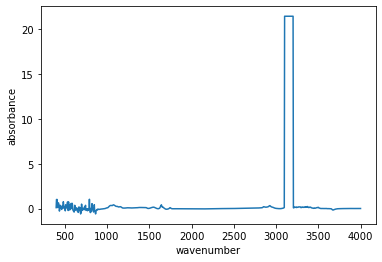

In [51]:
df_spc.iloc[0, :].plot(xlabel='wavenumber', ylabel='absorbance')

Hierboven is alleen een visualisatie te zien van sample 1.

In [52]:
df_spc.dtypes

397.306909     float64
401.164258     float64
405.021606     float64
408.878955     float64
412.736304     float64
                ...   
3984.641138    float64
3988.498486    float64
3992.355835    float64
3996.213184    float64
4000.070532    float64
Length: 935, dtype: object

In [53]:
df_spc.dtypes.value_counts()

float64    935
dtype: int64

In [54]:
df_spc.describe()

,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.019101,1.008154,1.008154,1.008154,0.045130,0.092672,0.039434,0.082148,0.076916,-0.004282,...,0.014376,0.014484,0.014439,0.014262,0.013983,0.013665,0.013361,0.013117,0.012963,0.012931
std,0.263529,0.000000,0.000000,0.000000,0.292574,0.299831,0.243963,0.309153,0.301658,0.234862,...,0.006178,0.006163,0.006176,0.006215,0.006277,0.006355,0.006453,0.006561,0.006661,0.006748
min,-0.374078,1.008154,1.008154,1.008154,-0.411707,-0.362181,-0.322525,-0.471212,-0.378885,-0.478711,...,0.005679,0.005765,0.005697,0.005502,0.005196,0.004851,0.004517,0.004238,0.004064,0.004033
25%,-0.148084,1.008154,1.008154,1.008154,-0.181972,-0.126833,-0.150936,-0.127969,-0.133574,-0.181997,...,0.009990,0.010106,0.010031,0.009787,0.009402,0.008964,0.008552,0.008189,0.007926,0.007807
50%,-0.060777,1.008154,1.008154,1.008154,0.017970,0.001754,0.002790,0.066113,0.026855,-0.047493,...,0.012522,0.012608,0.012591,0.012422,0.012126,0.011816,0.011566,0.011209,0.010951,0.010839
75%,0.150368,1.008154,1.008154,1.008154,0.206894,0.385710,0.159366,0.244046,0.289392,0.152255,...,0.016332,0.016427,0.016421,0.016320,0.016130,0.015992,0.015915,0.015909,0.015983,0.016084
max,0.691449,1.008154,1.008154,1.008154,0.888871,0.750735,0.716278,1.104684,0.923787,0.643752,...,0.032885,0.032944,0.032911,0.032801,0.032630,0.032445,0.032323,0.032285,0.032303,0.032418


Hierboven zien wij onze feature data. Daarmee moeten wij een model maken die dus kan voorspellen welke hoeveelheid vet, eitwitten en lactose er in een sample zit die nog niet is gemeten. 

# Subfiles feature data

Elk sample heeft dus 3 replica's om aan te kunnen tonen dat de sample betrouwbaar is als alle recplica's overeen komen. Toch zal daar iets verschil in zitten. Daarom wil ik daar een gemiddelde uit halen van deze 3.

In [55]:
import spc_spectra as spc
from pathlib import Path
import pandas as pd
import numpy as np

In [56]:
df_total = []

for file in Path('./Spectra').iterdir(): #glob('Sample *.spc'):
    f = spc.File(file)
    sample_df = pd.DataFrame(np.array([f.sub[0].y,f.sub[1].y,f.sub[2].y]),columns=f.x)
    sample_df.insert(loc=0, column='s_name', value=file)
    df_total.append(sample_df)
df_total = pd.concat(df_total)
print(df_total)

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
                   s_name  397.30690917943  401.16425781224  405.02160644505  \
0    Spectra\Sample 1.spc         0.469832         1.008154         1.008154   
1    Spectra\Sample 1.spc        -0.135354         1.008154         1.008154   
2    Spectra\Sample 1.spc         0.102523         1.008154         1.008154   
0   Spectra\Sample 10.spc        -0.355521         1.008154         1.008154   
1   Spectra\Sample 10.spc        -0.374311         1.008154         1.008154   
..                    ...              ...              ...              ...   
1    Spectra\Sample 8.spc         0.824058         1.008

In [57]:
df_total.head()

,s_name,397.30690917943,401.16425781224,405.02160644505,408.87895507786004,412.73630371067003,416.59365234348,420.45100097629,424.3083496091,428.16569824191004,...,3965.35439452868,3969.21174316149,3973.0690917942998,3976.92644042711,3980.78378905992,3984.64113769273,3988.49848632554,3992.35583495835,3996.21318359116,4000.07053222397
0,Spectra\Sample 1.spc,0.469832,1.008154,1.008154,1.008154,0.052305,0.115211,0.258473,-0.136622,-0.067475,...,0.008624,0.008933,0.008978,0.008795,0.008411,0.007903,0.007321,0.006737,0.006204,0.005813
1,Spectra\Sample 1.spc,-0.135354,1.008154,1.008154,1.008154,-0.016709,0.101999,0.034435,-0.187145,-0.057800,...,0.008906,0.009205,0.009256,0.009075,0.008686,0.008180,0.007607,0.007015,0.006492,0.006116
2,Spectra\Sample 1.spc,0.102523,1.008154,1.008154,1.008154,0.108095,0.386348,0.587932,0.636955,0.505134,...,0.008786,0.009086,0.009137,0.008949,0.008572,0.008057,0.007464,0.006890,0.006382,0.005994
0,Spectra\Sample 10.spc,-0.355521,1.008154,1.008154,1.008154,-0.322469,-0.030074,0.006049,0.194777,-0.155512,...,0.014614,0.014709,0.014709,0.014640,0.014527,0.014412,0.014326,0.014299,0.014337,0.014481
1,Spectra\Sample 10.spc,-0.374311,1.008154,1.008154,1.008154,0.024214,0.264530,0.061759,0.096896,-0.009429,...,0.016369,0.016460,0.016474,0.016417,0.016295,0.016165,0.016093,0.016077,0.016112,0.016253


In [58]:
df_total.describe()

,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.062091,1.008154,1.008154,1.008154,0.038926,0.041604,0.023389,0.055695,0.060582,-0.007331,...,0.014277,0.014385,0.014339,0.014161,0.013879,0.013558,0.013249,0.013000,0.012841,0.012806
std,0.297400,0.000000,0.000000,0.000000,0.303468,0.279022,0.275377,0.292416,0.275573,0.241485,...,0.006103,0.006086,0.006097,0.006133,0.006193,0.006272,0.006370,0.006474,0.006573,0.006660
min,-0.520073,1.008154,1.008154,1.008154,-0.411707,-0.423979,-0.578786,-0.624500,-0.394312,-0.520060,...,0.005346,0.005422,0.005357,0.005170,0.004869,0.004520,0.004184,0.003923,0.003771,0.003733
25%,-0.138649,1.008154,1.008154,1.008154,-0.182445,-0.170093,-0.158010,-0.131780,-0.147929,-0.182760,...,0.009867,0.009969,0.009898,0.009653,0.009301,0.008883,0.008438,0.008090,0.007863,0.007761
50%,0.011540,1.008154,1.008154,1.008154,-0.024488,-0.016108,-0.006690,0.039170,0.000661,-0.038658,...,0.012841,0.012917,0.012812,0.012596,0.012363,0.012076,0.011779,0.011414,0.011224,0.011160
75%,0.249822,1.008154,1.008154,1.008154,0.204933,0.227104,0.134478,0.243972,0.260466,0.143291,...,0.016060,0.016192,0.016164,0.016010,0.015908,0.015683,0.015276,0.015042,0.015000,0.015085
max,1.223340,1.008154,1.008154,1.008154,1.192200,0.750735,1.138654,1.104684,0.923787,0.737357,...,0.032885,0.032944,0.032911,0.032801,0.032630,0.032445,0.032323,0.032285,0.032303,0.032418


Wat we nu hebben is een dataframe met alle samples plus de replica's erin. Vanuit daar moet ik nu per sample het gemiddelde per colom berekenen. Daarna moet ik nog een range van tussen de 1000 en 3000 maken. Dat betekent een hoop collommen moeten droppen.

Voor de duidelijkheid heb ik een colum toegevoegd die de naam van de sample laat zien. Zo is het duidelijk over welk sample de replica gaat.

# Data Preparation

Op dit moment hebben we duidelijk wat onze labels en features zijn. Nu moet nog bepaald worden hoe we deze met elkaar matchen en daaruit test en train data kunnen maken. 

Daarnaast moet bepaald worden of wij alle data gebruiken of dat wij daar al data uit gaan filteren die toch overbodig zijn. 

Wat ga ik doen: gemiddelde per sample met gelimiteerde van (1000-3000). Dat houdt in dat ik nu een dataframe heb met de benodigde data. Deze data moet per sample nog een gemiddelde over berekend worden. Daarna ga ik de data limiteren door alleen naar de colums tussen de 1000 en 3000 te kijken.

In [59]:
df_average = df_total.groupby(np.arange(len(df_total))//3).mean()

In [66]:
print(df_average.shape)
df_average.head()

(48, 935)


,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
0,0.145667,1.008154,1.008154,1.008154,0.047897,0.201186,0.293613,0.104396,0.126620,-0.012895,...,0.008772,0.009075,0.009124,0.008940,0.008556,0.008047,0.007464,0.006881,0.006359,0.005974
1,-0.269919,1.008154,1.008154,1.008154,-0.097729,0.036329,-0.003050,0.098396,0.008332,0.094464,...,0.015733,0.015823,0.015833,0.015774,0.015661,0.015546,0.015467,0.015444,0.015484,0.015622
2,-0.216030,1.008154,1.008154,1.008154,-0.187241,0.145264,0.201331,0.151591,0.219409,0.078085,...,0.011971,0.012060,0.011962,0.011706,0.011340,0.010936,0.010530,0.010188,0.009956,0.009868
3,-0.053435,1.008154,1.008154,1.008154,-0.034041,0.083567,-0.003909,-0.064949,-0.137298,0.216180,...,0.015902,0.015950,0.015858,0.015665,0.015404,0.015122,0.014871,0.014705,0.014629,0.014670
4,-0.062140,1.008154,1.008154,1.008154,0.005354,0.309896,0.042895,0.021930,0.086493,-0.204544,...,0.008087,0.008240,0.008175,0.007918,0.007530,0.007069,0.006590,0.006160,0.005822,0.005637


Nu heb ik het gemiddelde per sample. Vanuit daar hoef ik alleen de overbodige colums nog te verwijderen.

In [94]:
df_slice_data = df_average.iloc[:, 157:677] # proberen de juiste coluhms te krijgen tussen de 1000 en 3000
df_slice_data.head()

,1002.910645,1006.767993,1010.625342,1014.482690,1018.340039,1022.197388,1026.054736,1029.912085,1033.769434,1037.626782,...,2970.158447,2974.015796,2977.873145,2981.730493,2985.587842,2989.445190,2993.302539,2997.159888,3001.017236,3004.874585
0,0.081063,0.086667,0.108755,0.147073,0.191862,0.231257,0.263082,0.290974,0.314596,0.332060,...,0.105195,0.088565,0.073581,0.060170,0.048286,0.038094,0.029757,0.023201,0.017987,0.013212
1,0.068501,0.074709,0.096565,0.133983,0.177868,0.216683,0.248704,0.276939,0.300961,0.319057,...,0.137102,0.107968,0.082882,0.061273,0.042952,0.027495,0.014540,0.004070,-0.003953,-0.011235
2,0.065522,0.071284,0.091656,0.126961,0.168410,0.204965,0.234459,0.260609,0.282741,0.299282,...,0.111913,0.087998,0.067339,0.049432,0.034121,0.021388,0.011077,0.003066,-0.003244,-0.009248
3,0.053757,0.059936,0.080122,0.114380,0.154708,0.190277,0.219103,0.244604,0.266226,0.282283,...,0.110394,0.080877,0.056068,0.035027,0.017238,0.002615,-0.009021,-0.018260,-0.025558,-0.032432
4,0.071849,0.077781,0.098824,0.134638,0.176744,0.213759,0.243878,0.270601,0.293316,0.310138,...,0.111032,0.089792,0.071215,0.054863,0.040948,0.029314,0.019698,0.011922,0.006117,0.001255


In [95]:
df_valsspeler = pd.read_excel('help.xlsx')
df_valsspeler = df_valsspeler.set_index('index')

In [96]:
df_feature_avg = pd.concat([df_valsspeler,df_slice_data], axis=1)
df_feature_avg.head()

,samplename,1002.9106445306,1006.76799316341,1010.62534179622,1014.4826904290301,1018.34003906184,1022.19738769465,1026.05473632746,1029.91208496027,1033.76943359308,...,2970.1584472637,2974.01579589651,2977.87314452932,2981.73049316213,2985.58784179494,2989.44519042775,2993.30253906056,2997.15988769337,3001.01723632618,3004.87458495899
0,Sample 1.spc,0.081063,0.086667,0.108755,0.147073,0.191862,0.231257,0.263082,0.290974,0.314596,...,0.105195,0.088565,0.073581,0.060170,0.048286,0.038094,0.029757,0.023201,0.017987,0.013212
1,Sample 10.spc,0.068501,0.074709,0.096565,0.133983,0.177868,0.216683,0.248704,0.276939,0.300961,...,0.137102,0.107968,0.082882,0.061273,0.042952,0.027495,0.014540,0.004070,-0.003953,-0.011235
2,Sample 11.spc,0.065522,0.071284,0.091656,0.126961,0.168410,0.204965,0.234459,0.260609,0.282741,...,0.111913,0.087998,0.067339,0.049432,0.034121,0.021388,0.011077,0.003066,-0.003244,-0.009248
3,Sample 12.spc,0.053757,0.059936,0.080122,0.114380,0.154708,0.190277,0.219103,0.244604,0.266226,...,0.110394,0.080877,0.056068,0.035027,0.017238,0.002615,-0.009021,-0.018260,-0.025558,-0.032432
4,Sample 13.spc,0.071849,0.077781,0.098824,0.134638,0.176744,0.213759,0.243878,0.270601,0.293316,...,0.111032,0.089792,0.071215,0.054863,0.040948,0.029314,0.019698,0.011922,0.006117,0.001255


In [98]:
df_features = df_feature_avg.iloc[:, 1:]
df_features.head()

,1002.910645,1006.767993,1010.625342,1014.482690,1018.340039,1022.197388,1026.054736,1029.912085,1033.769434,1037.626782,...,2970.158447,2974.015796,2977.873145,2981.730493,2985.587842,2989.445190,2993.302539,2997.159888,3001.017236,3004.874585
0,0.081063,0.086667,0.108755,0.147073,0.191862,0.231257,0.263082,0.290974,0.314596,0.332060,...,0.105195,0.088565,0.073581,0.060170,0.048286,0.038094,0.029757,0.023201,0.017987,0.013212
1,0.068501,0.074709,0.096565,0.133983,0.177868,0.216683,0.248704,0.276939,0.300961,0.319057,...,0.137102,0.107968,0.082882,0.061273,0.042952,0.027495,0.014540,0.004070,-0.003953,-0.011235
2,0.065522,0.071284,0.091656,0.126961,0.168410,0.204965,0.234459,0.260609,0.282741,0.299282,...,0.111913,0.087998,0.067339,0.049432,0.034121,0.021388,0.011077,0.003066,-0.003244,-0.009248
3,0.053757,0.059936,0.080122,0.114380,0.154708,0.190277,0.219103,0.244604,0.266226,0.282283,...,0.110394,0.080877,0.056068,0.035027,0.017238,0.002615,-0.009021,-0.018260,-0.025558,-0.032432
4,0.071849,0.077781,0.098824,0.134638,0.176744,0.213759,0.243878,0.270601,0.293316,0.310138,...,0.111032,0.089792,0.071215,0.054863,0.040948,0.029314,0.019698,0.011922,0.006117,0.001255


Wat ik nu heb gedaan is een colum samplename aan de gemiddelde data toegevoegd die op de juiste wijze is gesorteerd. 

In [76]:
label_data.head()

,Sample,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,Sample 1.spc,2.362,3.486,5.189
1,Sample 2.spc,6.438,3.692,4.878
2,Sample 3.spc,4.245,4.038,5.233
3,Sample 4.spc,4.171,4.235,5.120
4,Sample 5.spc,5.580,4.195,5.000


Wat we nu hebben is een dataframe met de colommen tussen de 1000 en 3000. Daarna moet ik de labels nog afsplitsen, ieder voor vet, eitwit en lactose. 

In [74]:
df_combined = pd.merge(df_feature_avg, label_data, left_on=df_feature_avg.samplename, right_on=label_data.Sample)
df_combined.head()

,key_0,samplename,1006.76799316341,1010.62534179622,1014.4826904290301,1018.34003906184,1022.19738769465,1026.05473632746,1029.91208496027,1033.76943359308,...,2985.58784179494,2989.44519042775,2993.30253906056,2997.15988769337,3001.01723632618,3004.87458495899,Sample,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,Sample 1.spc,Sample 1.spc,0.086667,0.108755,0.147073,0.191862,0.231257,0.263082,0.290974,0.314596,...,0.048286,0.038094,0.029757,0.023201,0.017987,0.013212,Sample 1.spc,2.362,3.486,5.189
1,Sample 10.spc,Sample 10.spc,0.074709,0.096565,0.133983,0.177868,0.216683,0.248704,0.276939,0.300961,...,0.042952,0.027495,0.014540,0.004070,-0.003953,-0.011235,Sample 10.spc,5.059,5.115,5.085
2,Sample 11.spc,Sample 11.spc,0.071284,0.091656,0.126961,0.168410,0.204965,0.234459,0.260609,0.282741,...,0.034121,0.021388,0.011077,0.003066,-0.003244,-0.009248,Sample 11.spc,4.035,4.012,4.764
3,Sample 12.spc,Sample 12.spc,0.059936,0.080122,0.114380,0.154708,0.190277,0.219103,0.244604,0.266226,...,0.017238,0.002615,-0.009021,-0.018260,-0.025558,-0.032432,Sample 12.spc,5.463,3.991,4.607
4,Sample 13.spc,Sample 13.spc,0.077781,0.098824,0.134638,0.176744,0.213759,0.243878,0.270601,0.293316,...,0.040948,0.029314,0.019698,0.011922,0.006117,0.001255,Sample 13.spc,3.389,3.953,4.880


Wat we nu zien is dat we een dataframe hebben waarin de features en labels zijn samengevoegd. Op deze manier hebben we de labels zo gesorteerd waardoor ze overeen komen met de features. Daarna kan ik de labels hier vanaf halen voor het gebruik in ons model.

In [78]:
label_data_lactose = df_combined.iloc[:,-1]
label_data_lactose.head()

0    5.189
1    5.085
2    4.764
3    4.607
4    4.880
Name: Lactose (%m/m), dtype: float64

In [79]:
label_data_protein = df_combined.iloc[:,-2]
label_data_protein.head()

0    3.486
1    5.115
2    4.012
3    3.991
4    3.953
Name: Protein (%m/m), dtype: float64

In [80]:
label_data_fat = df_combined.iloc[:,-3]
label_data_fat.head()

0    2.362
1    5.059
2    4.035
3    5.463
4    3.389
Name: Fat (%m/m), dtype: float64

Nu is er een dataframe voor elk van de labels: vet, lactose en eitwit. Daarmee kan ik deze labels makkelijk runnen in het Lasso model.

# Modeling

### Crossvalidatie

In [83]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_features, label_data_fat, test_size=0.3, random_state=10)

In [105]:
lasso_result = LassoCV(cv=5).fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01274347306867217, tolerance: 0.00456964589090909
  model = cd_fast.enet_coordinate_descent(


In [114]:
lasso_result.score(df_features,label_data_fat)

0.9998049790004843

In [118]:
lasso_result.alphas_

array([0.10709371, 0.09987596, 0.09314465, 0.08686701, 0.08101247,
       0.0755525 , 0.07046051, 0.06571171, 0.06128296, 0.05715269,
       0.05330079, 0.0497085 , 0.04635831, 0.04323392, 0.0403201 ,
       0.03760266, 0.03506836, 0.03270487, 0.03050067, 0.02844503,
       0.02652793, 0.02474004, 0.02307264, 0.02151762, 0.02006741,
       0.01871493, 0.01745361, 0.01627729, 0.01518026, 0.01415716,
       0.01320301, 0.01231317, 0.01148331, 0.01070937, 0.0099876 ,
       0.00931447, 0.0086867 , 0.00810125, 0.00755525, 0.00704605,
       0.00657117, 0.0061283 , 0.00571527, 0.00533008, 0.00497085,
       0.00463583, 0.00432339, 0.00403201, 0.00376027, 0.00350684,
       0.00327049, 0.00305007, 0.0028445 , 0.00265279, 0.002474  ,
       0.00230726, 0.00215176, 0.00200674, 0.00187149, 0.00174536,
       0.00162773, 0.00151803, 0.00141572, 0.0013203 , 0.00123132,
       0.00114833, 0.00107094, 0.00099876, 0.00093145, 0.00086867,
       0.00081012, 0.00075552, 0.00070461, 0.00065712, 0.00061

In [122]:
df_restult= pd.DataFrame(lasso_result.mse_path_)
df_result_t = df_restult.T
df_result_t.colums = lasso_result.alphas_

C:\Users\Bart_\AppData\Local\Temp/ipykernel_11828/2606829829.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_result_t.colums = lasso_result.alphas_


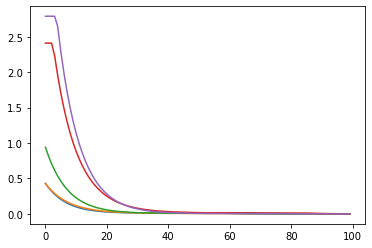

In [116]:
plt.plot(lasso_result.mse_path_)

<AxesSubplot:>

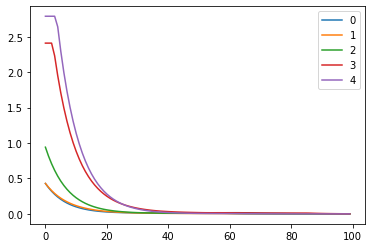

In [123]:
df_result_t.T.plot()